In [500]:
import pandas as pd
data = pd.read_csv('trainingData.csv')
data.head()

,id,choice,education,household,commute,type1,type2,type3,type4,type5,...,cost3,cost4,cost5,cost6,station1,station2,station3,station4,station5,station6
0,1,choice5,1,0,0,sportcar,truck,sportcar,sportuv,sportcar,...,2,2,6,6,0.0,0.0,0.1,0.1,1.0,1.0
1,2,choice5,1,1,1,sportuv,sportcar,sportuv,regcar,sportuv,...,6,6,8,8,0.0,0.0,0.3,0.3,1.0,1.0
2,3,choice5,1,0,0,regcar,stwagon,regcar,truck,regcar,...,6,6,8,8,0.0,0.0,0.3,0.3,1.0,1.0
3,4,choice4,1,0,1,regcar,van,regcar,stwagon,regcar,...,6,6,2,2,0.0,0.0,0.3,0.3,1.0,1.0
4,5,choice1,0,0,1,regcar,stwagon,regcar,truck,regcar,...,4,4,6,6,0.0,0.0,0.3,0.3,1.0,1.0


In [501]:
def replace_choice(choice):
    try:
        return int(choice[6:])
    except TypeError:
        return choice

def replace_carType(carType):
    try:
        types = ['van', 'regcar', 'sportuv', 'sportcar', 'stwagon', 'truck']
        return types.index(carType)
    except ValueError:
        return carType

def replace_fuelType(fuelType):
    try:
        types = ['cng', 'methanol', 'electric', 'gasoline']
        return types.index(fuelType)
    except ValueError:
        return fuelType

for type in data.columns[5:11]:
    data[type] = data[type].apply(replace_carType)
for type in data.columns[11:17]:
    data[type] = data[type].apply(replace_fuelType)

data['choice'] = data['choice'].apply(replace_choice)

data.drop(['id'], axis=1, inplace=True)
data.head()

,choice,education,household,commute,type1,type2,type3,type4,type5,type6,...,cost3,cost4,cost5,cost6,station1,station2,station3,station4,station5,station6
0,5,1,0,0,3,5,3,2,3,1,...,2,2,6,6,0.0,0.0,0.1,0.1,1.0,1.0
1,5,1,1,1,2,3,2,1,2,5,...,6,6,8,8,0.0,0.0,0.3,0.3,1.0,1.0
2,5,1,0,0,1,4,1,5,1,0,...,6,6,8,8,0.0,0.0,0.3,0.3,1.0,1.0
3,4,1,0,1,1,0,1,4,1,5,...,6,6,2,2,0.0,0.0,0.3,0.3,1.0,1.0
4,1,0,0,1,1,4,1,5,1,0,...,4,4,6,6,0.0,0.0,0.3,0.3,1.0,1.0


In [502]:
data_no_choices = data.drop(['choice'], axis=1)

In [503]:
data.describe()

,choice,education,household,commute,type1,type2,type3,type4,type5,type6,...,cost3,cost4,cost5,cost6,station1,station2,station3,station4,station5,station6
count,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,...,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000,4554.000000
mean,3.480237,0.767018,0.222881,0.358366,1.563022,3.075099,1.563022,2.380984,1.563022,3.084321,...,4.958718,4.958718,4.971893,4.971893,0.088845,0.088845,0.383048,0.383048,0.823276,0.823276
std,1.595260,0.422777,0.416225,0.479573,1.389491,2.064750,1.389491,2.189366,1.389491,1.903770,...,2.233967,2.233967,2.230630,2.230630,0.189786,0.189786,0.253069,0.253069,0.327559,0.327559
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000
25%,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.100000,0.100000,0.700000,0.700000
50%,3.000000,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.300000,0.300000,1.000000,1.000000
75%,5.000000,1.000000,0.000000,1.000000,1.000000,5.000000,1.000000,5.000000,1.000000,4.000000,...,6.000000,6.000000,6.000000,6.000000,0.100000,0.100000,0.700000,0.700000,1.000000,1.000000
max,6.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,8.000000,8.000000,8.000000,8.000000,0.700000,0.700000,0.700000,0.700000,1.000000,1.000000


In [504]:
data.corr()

,choice,education,household,commute,type1,type2,type3,type4,type5,type6,...,cost3,cost4,cost5,cost6,station1,station2,station3,station4,station5,station6
choice,1.000000,-0.042162,0.019701,0.031365,0.028108,-0.071965,0.028108,0.054634,0.028108,-0.002778,...,0.074282,0.074282,-0.085148,-0.085148,-0.100913,-0.100913,-0.028848,-0.028848,-0.002398,-0.002398
education,-0.042162,1.000000,-0.071797,-0.079916,-0.041738,-0.000835,-0.041738,0.019511,-0.041738,0.011042,...,-0.019720,-0.019720,0.011453,0.011453,-0.003382,-0.003382,0.003518,0.003518,-0.009205,-0.009205
household,0.019701,-0.071797,1.000000,-0.043729,-0.033977,-0.016925,-0.033977,0.020560,-0.033977,0.009262,...,0.003520,0.003520,-0.011467,-0.011467,0.017301,0.017301,0.008145,0.008145,0.006403,0.006403
commute,0.031365,-0.079916,-0.043729,1.000000,-0.038844,-0.052915,-0.038844,0.155055,-0.038844,-0.097336,...,-0.011199,-0.011199,0.020094,0.020094,-0.349894,-0.349894,-0.062859,-0.062859,-0.143014,-0.143014
type1,0.028108,-0.041738,-0.033977,-0.038844,1.000000,-0.284754,1.000000,-0.121138,1.000000,-0.248690,...,-0.009775,-0.009775,0.019279,0.019279,0.013660,0.013660,-0.017698,-0.017698,0.031183,0.031183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
station2,-0.100913,-0.003382,0.017301,-0.349894,0.013660,0.115022,0.013660,-0.275632,0.013660,0.184241,...,-0.058589,-0.058589,0.042113,0.042113,1.000000,1.000000,-0.048479,-0.048479,0.252621,0.252621
station3,-0.028848,0.003518,0.008145,-0.062859,-0.017698,0.087429,-0.017698,-0.137669,-0.017698,0.073811,...,-0.128587,-0.128587,-0.022088,-0.022088,-0.048479,-0.048479,1.000000,1.000000,-0.256963,-0.256963
station4,-0.028848,0.003518,0.008145,-0.062859,-0.017698,0.087429,-0.017698,-0.137669,-0.017698,0.073811,...,-0.128587,-0.128587,-0.022088,-0.022088,-0.048479,-0.048479,1.000000,1.000000,-0.256963,-0.256963
station5,-0.002398,-0.009205,0.006403,-0.143014,0.031183,-0.190419,0.031183,0.352820,0.031183,-0.218382,...,0.100783,0.100783,-0.000968,-0.000968,0.252621,0.252621,-0.256963,-0.256963,1.000000,1.000000


array([[<AxesSubplot:title={'center':'choice'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'household'}>,
        <AxesSubplot:title={'center':'commute'}>]], dtype=object)

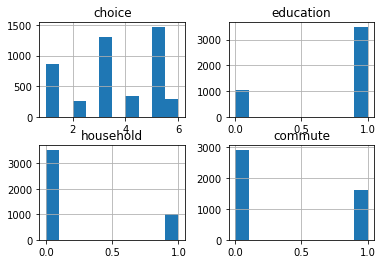

In [505]:
data.hist(column=['choice', 'education', 'household', 'commute'])


In [506]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
arr = data_no_choices.to_numpy()
arr_scaled = scaler.fit_transform(arr)
scaled_data = pd.DataFrame(arr_scaled)
data.head()

,choice,education,household,commute,type1,type2,type3,type4,type5,type6,...,cost3,cost4,cost5,cost6,station1,station2,station3,station4,station5,station6
0,5,1,0,0,3,5,3,2,3,1,...,2,2,6,6,0.0,0.0,0.1,0.1,1.0,1.0
1,5,1,1,1,2,3,2,1,2,5,...,6,6,8,8,0.0,0.0,0.3,0.3,1.0,1.0
2,5,1,0,0,1,4,1,5,1,0,...,6,6,8,8,0.0,0.0,0.3,0.3,1.0,1.0
3,4,1,0,1,1,0,1,4,1,5,...,6,6,2,2,0.0,0.0,0.3,0.3,1.0,1.0
4,1,0,0,1,1,4,1,5,1,0,...,4,4,6,6,0.0,0.0,0.3,0.3,1.0,1.0


In [507]:
# scaled_data = scaled_data.drop(scaled_data.columns[3:], axis=1)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,1.0,0.0,0.0,0.6,1.0,0.6,0.4,0.6,0.2,1.0,...,0.000000,0.000000,0.666667,0.666667,0.0,0.0,0.000000,0.000000,1.0,1.0
1,1.0,1.0,1.0,0.4,0.6,0.4,0.2,0.4,1.0,1.0,...,0.666667,0.666667,1.000000,1.000000,0.0,0.0,0.333333,0.333333,1.0,1.0
2,1.0,0.0,0.0,0.2,0.8,0.2,1.0,0.2,0.0,1.0,...,0.666667,0.666667,1.000000,1.000000,0.0,0.0,0.333333,0.333333,1.0,1.0
3,1.0,0.0,1.0,0.2,0.0,0.2,0.8,0.2,1.0,1.0,...,0.666667,0.666667,0.000000,0.000000,0.0,0.0,0.333333,0.333333,1.0,1.0
4,0.0,0.0,1.0,0.2,0.8,0.2,1.0,0.2,0.0,1.0,...,0.333333,0.333333,0.666667,0.666667,0.0,0.0,0.333333,0.333333,1.0,1.0


In [508]:
from sklearn.model_selection import train_test_split


# X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['choice'], axis=1),
#                                                     data['choice'], train_size=0.9, test_size=0.1)
# X_train, X_test, Y_train, Y_test = train_test_split(scaled_data.drop(scaled_data.columns[3:], axis=1),
#                                                     data['choice'], train_size=0.9, test_size=0.1)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, data['choice'], train_size=0.9, test_size=0.1)

In [509]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_features='auto')
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [499]:
results = model.predict(X_test)
model_score = model.score(X_test, Y_test)
print(model_score)

0.35964912280701755
